In [16]:
# Testing the AmesPAHdb class from amespahdbpythonsuite and readibility of the XML file
import pandas as pd
from amespahdbpythonsuite.amespahdb import AmesPAHdb
pahdb = AmesPAHdb(filename='/Users/Mustafa/Documents/GitHub/Project-Cynap/Cynapfolder/Database/pahdb-complete-theoretical-v4.00-alpha.xml', cache=True, check=False)

                 AmesPAHdbPythonSuite
                 
                          by
                          
                Dr. Christiaan Boersma
                
                          and
                         
             Dr. Alexandros Maragkoudakis
             
               Dr. Matthew J. Shannanon
               
                  Dr. Joseph E. Roser
                 

          SUITE VERSION: 0.5.0.post75+g22706ce         

           WEBSITE: WWW.ASTROCHEM.ORG/PAHDB/           

          CONTACT: CHRISTIAAN.BOERSMA@NASA.GOV         

             RESTORING DATABASE FROM CACHE             

==
FILENAME                    : C:\Users\Mustafa\AppData\Local\Temp/5f2987552b21bc98ef167d197b868772.pkl
ORIGNINAL FILENAME          : /Users/Mustafa/Documents/GitHub/Project-Cynap/Cynapfolder/Database/pahdb-complete-theoretical-v4.00-alpha.xml
PARSE TIME                  : 0:00:32.881685
DATABASE                    : theoretical
VERSION (DATE)              : 4.00-alpha (2023

In [ ]:
# Shows UIDS of neutral and cation cyanonaphthalene molecules
uids = pahdb.search("c=11 n=1") 

pahs = pahdb.getspeciesbyuid(uids)

print(pahs)

AmesPAHdbPythonSuite Species instance.
self.uids=[465, 463, 466, 464]


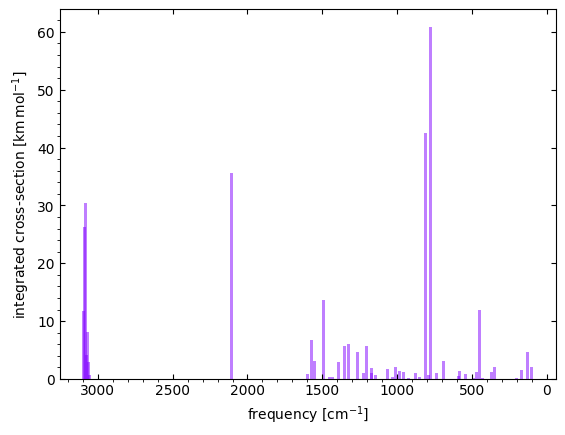

         WRITTEN: neutral1cyano_transitions.tbl        



In [36]:
# Plotting & extracting the vibrational frequency data of 1-cyanonaphthalene in a table (UID = 465)
transitions = pahdb.gettransitionsbyuid(uids[0])
transitions.plot(show=True)
transitions.write('neutral1cyano_transitions.tbl')

In [37]:
# Reading of the full transitions table for 1-cyanonaphthalene
df = pd.read_csv('/Users/Mustafa/Documents/GitHub/Project-Cynap/Cynapfolder/neutral1cyano_transitions.tbl', 
                 skiprows=11, 
                 sep='\s+', 
                 names=["UID", "FREQUENCY", "INTENSITY", "SCALE", "SYMMETRY"])

# Apply the scaling to get accurate physical frequencies
df['FREQUENCY_SCALED'] = df['FREQUENCY'] * df['SCALE']

# Filter frequency rows where the INTENSITY is larger than 10
filtered_df = df[df['INTENSITY'] > 10]

# Gets the filtered physical frequencies in a list based on the intensity threshold
strong_frequencies_list = filtered_df['FREQUENCY_SCALED'].tolist()

print(strong_frequencies_list)

# Save the strong frequencies to a CSV file
pd.Series(strong_frequencies_list).to_csv('strong_frequencies_neutral1cyano.csv', index=False, header=False)

[433.90152085, 745.5484065100001, 773.30740476, 1423.56508192, 1914.4869383199998, 2954.1275981000003, 2965.04027945, 2968.5415909000003]


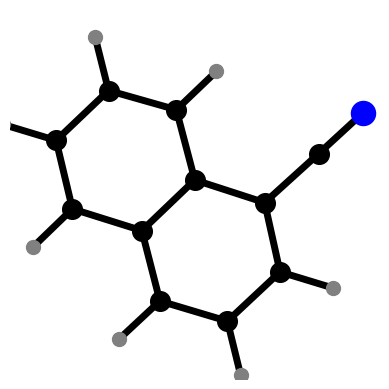

In [38]:
geometry = pahdb.getgeometrybyuid(uids[0])

geometry.plot(uids[0])

# img = geometry.structure(uids[0])

# masses = geometry.mass()

# rings = geometry.rings()

# areas = geometry.area()

# matrix = geometry.inertia()

# print(masses)
# print(rings)
# print(areas)
# print(matrix)